### 1. 목표
- 손글씨 데이터를 분류하는 모델 만들기
- 이미지 데이터의 형태를 이해
- 예측의 불확실성 확인
- 다양한 분류평가지표를 이해

#### 1.1 데이터 로딩

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('./data/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv('./data/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

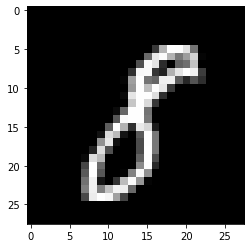

In [21]:
# 이미지 확인
## 이미지 한장 자르기
img = train.iloc[5000,1:]
## 이미지를 보여주는 함수
plt.imshow(img.values.reshape(28,28),
            cmap='gray') #색상환(색상팔레트) 변경


#### 1.2 모델링
- KNN
- Tree
- SGD(경사하강법 선형모델)
- LogisticRegression
- LinearSVM

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [8]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

In [39]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [ ]:
# 시간상 튜닝은 생략하고 교차검증만 진행할것임
# rf_model = KNeighborsClassifier() -> 0.965857142857143
# rf_model = DecisionTreeClassifier() -> 0.8538095238095238
# rf_model = SGDClassifier() -> 0.8711904761904762
# rf_model = LogisticRegression() -> 0.9158571428571427
# rf_model = LinearSVC() -> 0.8532142857142858

In [ ]:
from sklearn.model_selection import cross_val_score

In [33]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
SGD_model = SGDClassifier()
logi_model = LogisticRegression()
svc_model = LinearSVC()

In [34]:
knn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
logi_model.fit(X_train,y_train)
svc_model.fit(X_train,y_train)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [30]:
# 교차검증
knn_score = cross_val_score(knn_model,X_train,y_train,cv=3)
tree_score = cross_val_score(tree_model,X_train,y_train,cv=3)
SGD_score = cross_val_score(SGD_model,X_train,y_train,cv=3)
logi_score = cross_val_score(logi_model,X_train,y_train,cv=3)
svc_score = cross_val_score(svc_model,X_train,y_train,cv=3)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print("knn score : ",knn_score.mean())
print("tree score : ",tree_score.mean())
print("SGD score : ",SGD_score.mean())
print("logi score : ",logi_score.mean())
print("svc score : ",svc_score.mean())

In [62]:
test = test[['age','education-num','capital-gain','capital-loss','hours-per-week','workclass_ Federal-gov',
 'workclass_ Self-emp-inc','marital-status_ Married-AF-spouse','marital-status_ Married-civ-spouse','occupation_ ?',
 'occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Exec-managerial','occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service','occupation_ Priv-house-serv','occupation_ Prof-specialty',
 'occupation_ Protective-serv','relationship_ Husband','relationship_ Not-in-family',
 'relationship_ Other-relative','relationship_ Other-relative','relationship_ Own-child',
 'relationship_ Unmarried','relationship_ Wife','race_ Amer-Indian-Eskimo','race_ Black','race_ Other','sex_ Female','sex_ Male','native-country_ Cambodia',
 'native-country_ Canada','native-country_ Columbia','native-country_ Dominican-Republic','native-country_ Dominican-Republic','native-country_ Ecuador',
 'native-country_ El-Salvador','native-country_ England','native-country_ France','native-country_ Germany','native-country_ Greece','native-country_ Guatemala',
 'native-country_ Haiti','native-country_ Holand-Netherlands','native-country_ Honduras','native-country_ Hungary','native-country_ India','native-country_ Iran',
 'native-country_ Ireland','native-country_ Italy','native-country_ Jamaica','native-country_ Japan','native-country_ Laos','native-country_ Mexico','native-country_ Nicaragua',
 'native-country_ Outlying-US(Guam-USVI-etc)','native-country_ Peru','native-country_ Philippines','native-country_ Poland','native-country_ Portugal','native-country_ Puerto-Rico',
 'native-country_ Scotland','native-country_ South','native-country_ Taiwan','native-country_ Thailand','native-country_ Trinadad&Tobago','native-country_ Vietnam','native-country_ Yugoslavia']]

KeyError: "None of [Index(['age', 'education-num', 'capital-gain', 'capital-loss',\n       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Self-emp-inc',\n       'marital-status_ Married-AF-spouse',\n       'marital-status_ Married-civ-spouse', 'occupation_ ?',\n       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',\n       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',\n       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',\n       'occupation_ Other-service', 'occupation_ Priv-house-serv',\n       'occupation_ Prof-specialty', 'occupation_ Protective-serv',\n       'relationship_ Husband', 'relationship_ Not-in-family',\n       'relationship_ Other-relative', 'relationship_ Other-relative',\n       'relationship_ Own-child', 'relationship_ Unmarried',\n       'relationship_ Wife', 'race_ Amer-Indian-Eskimo', 'race_ Black',\n       'race_ Other', 'sex_ Female', 'sex_ Male', 'native-country_ Cambodia',\n       'native-country_ Canada', 'native-country_ Columbia',\n       'native-country_ Dominican-Republic',\n       'native-country_ Dominican-Republic', 'native-country_ Ecuador',\n       'native-country_ El-Salvador', 'native-country_ England',\n       'native-country_ France', 'native-country_ Germany',\n       'native-country_ Greece', 'native-country_ Guatemala',\n       'native-country_ Haiti', 'native-country_ Holand-Netherlands',\n       'native-country_ Honduras', 'native-country_ Hungary',\n       'native-country_ India', 'native-country_ Iran',\n       'native-country_ Ireland', 'native-country_ Italy',\n       'native-country_ Jamaica', 'native-country_ Japan',\n       'native-country_ Laos', 'native-country_ Mexico',\n       'native-country_ Nicaragua',\n       'native-country_ Outlying-US(Guam-USVI-etc)', 'native-country_ Peru',\n       'native-country_ Philippines', 'native-country_ Poland',\n       'native-country_ Portugal', 'native-country_ Puerto-Rico',\n       'native-country_ Scotland', 'native-country_ South',\n       'native-country_ Taiwan', 'native-country_ Thailand',\n       'native-country_ Trinadad&Tobago', 'native-country_ Vietnam',\n       'native-country_ Yugoslavia'],\n      dtype='object')] are in the [columns]"

In [32]:
# kaggle 사이트에 올려보기
test.shape

(28000, 784)

In [36]:
knn_pre = knn_model.predict(test)
tree_pre = tree_model.predict(test)
SGD_pre = SGD_model.predict(test)
logi_pre = logi_model.predict(test)
svc_pre = svc_model.predict(test)

In [37]:
submission = pd.read_csv("./data/digit-recognizer/sample_submission.csv")
submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [38]:
#예측 값 파일로 저장
submission['Label'] = knn_pre
submission.to_csv("./data/digit-recognizer/knn1.csv", index=False)
submission['Label'] = tree_pre
submission.to_csv("./data/digit-recognizer/tree1.csv", index=False)
submission['Label'] = SGD_pre
submission.to_csv("./data/digit-recognizer/SGD1.csv", index=False)
submission['Label'] = logi_pre
submission.to_csv("./data/digit-recognizer/logi1.csv", index=False)
submission['Label'] = svc_pre
submission.to_csv("./data/digit-recognizer/svc1.csv", index=False)

#### 1.3 스케일링 적용하기
- 거리를 기반으로하는 모델
- 경사하강법 모델
- 스케일링을 적용해서 성능이나 연산 시간을 단축시킬 수 있다.

In [ ]:
# RGB 는 0~255 까지로 최대최소값이 정해져 있어서 
# MinMaxScaler를 사용해 0~1사이값으로 스케일링

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler() # 스케일러 객체 생성
scaler.fit(X_train) # 기준값 찾기(최대값, 최소값) 

MinMaxScaler()

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(test)

In [ ]:
# 스테일된 데이터로 학습해서 kaggle에 test데이터 업로드

In [44]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
SGD_model = SGDClassifier()
logi_model = LogisticRegression()
svc_model = LinearSVC()

In [45]:
knn_model.fit(X_train_scaled,y_train)
tree_model.fit(X_train_scaled,y_train)
SGD_model.fit(X_train_scaled,y_train)
logi_model.fit(X_train_scaled,y_train)
svc_model.fit(X_train_scaled,y_train)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [46]:
# 시간상 교차검증 생략하고 학습시키기
knn_pre = knn_model.predict(X_test_scaled)
tree_pre = tree_model.predict(X_test_scaled)
SGD_pre = SGD_model.predict(X_test_scaled)
logi_pre = logi_model.predict(X_test_scaled)
svc_pre = svc_model.predict(X_test_scaled)

In [47]:
#KNN 예측 값 파일로 저장
submission['Label'] = knn_pre
submission.to_csv("./data/digit-recognizer/knn2.csv", index=False)
submission['Label'] = tree_pre
submission.to_csv("./data/digit-recognizer/tree2.csv", index=False)
submission['Label'] = SGD_pre
submission.to_csv("./data/digit-recognizer/SGD2.csv", index=False)
submission['Label'] = logi_pre
submission.to_csv("./data/digit-recognizer/logi2.csv", index=False)
submission['Label'] = svc_pre
submission.to_csv("./data/digit-recognizer/svc2.csv", index=False)

#### 1.4 예측의 불확실성
- 분류 모델들은 항상 최종결과 이전에 확률을 계산

In [53]:
logi_model.predict(train.iloc[10000:10001,1:])  # 예측의 확률값을 계산

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([8], dtype=int64)

In [52]:
logi_model.predict_proba(train.iloc[10000:10001,1:]) # 예측의 확률값을 계산(확률정도 확인 가능)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[3.34928286e-138, 0.00000000e+000, 3.08263818e-083,
        5.09631388e-205, 0.00000000e+000, 0.00000000e+000,
        8.49119454e-236, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000]])

#### 1.5 분류평가지표

In [11]:
# 분류 모델의 평가지표를 요약해서 보여주는 함수
from sklearn.metrics import classification_report

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state=1004)

In [14]:
logi_model3 = LogisticRegression()
logi_model3.fit(X_train,y_train)
pre = logi_model3.predict(X_val)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(classification_report(pre,y_val))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       813
           1       0.97      0.94      0.95       891
           2       0.88      0.90      0.89       763
           3       0.88      0.89      0.89       796
           4       0.92      0.91      0.92       763
           5       0.83      0.88      0.86       663
           6       0.94      0.93      0.93       775
           7       0.92      0.92      0.92       841
           8       0.86      0.84      0.85       767
           9       0.91      0.90      0.91       803

    accuracy                           0.91      7875
   macro avg       0.91      0.91      0.91      7875
weighted avg       0.91      0.91      0.91      7875



#### 1.6 모델 저장하기(pickle)
- pickle : 파이썬 클래스를 직렬화해서 저장하기 좋게 만들어주는 도구
           (원래형태 그대로 저장하고 반환)

In [17]:
import pickle

In [18]:
# 모델저장
with open('./digit_model.pkl','wb') as f :     # wb 쓰기모드
    pickle.dump(logi_model3, f)

In [19]:
# 모델로딩
with open('./digit_model.pkl','rb') as f:
    m = pickle.load(f)

In [22]:
m.predict(X_val)

array([9, 9, 0, ..., 9, 9, 2], dtype=int64)